In [10]:
import numpy as np

import pandas as pd

import hdbscan

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [11]:
# Define the dataset path
dataset_path = "/Users/Dataghost/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv"

# Load the dataset
df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [12]:
# Selecting relevant features

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
# Standardizing the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [14]:
# Applying HDBSCAN

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')

labels = hdb.fit_predict(X_scaled)

In [15]:
# Add cluster labels to dataset

df['Cluster'] = labels

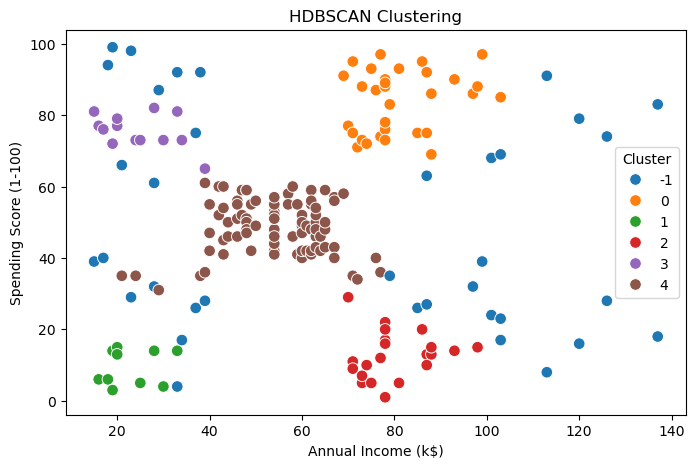

In [16]:
# Visualizing the Clusters

plt.figure(figsize=(8,5))

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'],palette='tab10', s=70 )

plt.title('HDBSCAN Clustering')

plt.show()